In [31]:
# Initial imports
import os
import requests
import json
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
#Initialize timestamp

timestamp = 1618416000 ## 04/14/21 11:00:00AM Central

In [3]:
#Create df to hold downloaded data

btcusdfinal = pd.DataFrame()

In [4]:
#Run while loop to collect data between 04/14/21 11:00:00AM Central and 04/15/21 11:00:00AM Central

while timestamp<=1618502400: ## 04/15/21 11:00:00AM Central
    btcusdurl = f"https://api.gemini.com/v1/trades/btcusd?limit_trades=500&timestamp={timestamp}"
    btcusd = requests.get(btcusdurl)
    btcusd_json = btcusd.json()
    btcusd_jsondf = pd.DataFrame(btcusd_json)
    btcusdfinal = btcusd_jsondf.append(btcusdfinal)
    btcusdfinal.reset_index(drop=True, inplace=True)
    timestamp = btcusdfinal.iloc[0]['timestamp']
    txnid = btcusdfinal.iloc[0]['tid']
    print(f"{timestamp} , {txnid}") # Print while executing loop to show progress and ensure there are no snags
    time.sleep(1) # Wait 1 second to avoid rate limiting on public api   

1618417001 , 33705855226
1618417668 , 33707886264
1618418741 , 33710604205
1618419849 , 33713444672
1618420992 , 33716034702
1618421751 , 33718673672
1618422132 , 33720364071
1618422484 , 33721842474
1618423024 , 33723599814
1618423231 , 33724434599
1618423452 , 33725430279
1618423651 , 33726266646
1618423841 , 33727117222
1618424365 , 33729008018
1618425246 , 33732048222
1618426010 , 33734305435
1618426774 , 33736651817
1618427248 , 33738359972
1618427952 , 33740543915
1618428465 , 33742165161
1618428748 , 33743086522
1618428924 , 33743828222
1618429439 , 33745378947
1618429550 , 33745693777
1618429827 , 33746321744
1618430044 , 33746775939
1618430143 , 33747103148
1618430410 , 33747812576
1618431227 , 33749907568
1618432140 , 33751904703
1618432957 , 33753298698
1618433741 , 33754846106
1618434410 , 33756307445
1618435489 , 33758106508
1618436565 , 33760182047
1618437641 , 33762608415
1618438655 , 33765142632
1618440210 , 33769307583
1618441554 , 33772804312
1618442983 , 33776386263


In [5]:
# Convert timestamp to datetime

btcusdfinal['time'] = pd.to_datetime(btcusdfinal['timestamp'], unit = "s")

In [6]:
# Drop any entries after stop time

btcusdfinal.drop(btcusdfinal[btcusdfinal['time'] > '2021-04-15 16:00:00'].index)

,timestamp,timestampms,tid,price,amount,exchange,type,time
28,1618502399,1618502399560,33924749213,62765.45,0.00061656,gemini,sell,2021-04-15 15:59:59
29,1618502399,1618502399417,33924748884,62778.28,0.00260583,gemini,buy,2021-04-15 15:59:59
30,1618502399,1618502399417,33924748882,62762.30,0.00008263,gemini,buy,2021-04-15 15:59:59
31,1618502399,1618502399417,33924748880,62762.30,0.00031656,gemini,buy,2021-04-15 15:59:59
32,1618502394,1618502394575,33924733382,62761.41,0.00039771,gemini,sell,2021-04-15 15:59:54
...,...,...,...,...,...,...,...,...
36495,1618416021,1618416021949,33702708642,63140.46,0.00005826,gemini,buy,2021-04-14 16:00:21
36496,1618416021,1618416021665,33702707550,63127.00,0.00009831,gemini,buy,2021-04-14 16:00:21
36497,1618416021,1618416021413,33702706643,63127.00,0.0003,gemini,buy,2021-04-14 16:00:21
36498,1618416008,1618416008488,33702665467,63074.89,0.29990598,gemini,buy,2021-04-14 16:00:08


In [7]:
# Reset Index

btcusdfinal.reset_index(drop=True, inplace=True)

In [8]:
# Drop unneeded columns

btcusdfinal.drop(['timestamp', 'timestampms', 'tid', 'exchange'], axis=1, inplace=True)

In [9]:
# Create column to hold hour signifier

btcusdfinal['hours']=""

In [10]:
# Categorize each trade by the hour in which it occurs

btcusdfinal.loc[(btcusdfinal.time < pd.to_datetime('2021-04-14 17:00:00')),['hours']] = 0
btcusdfinal.loc[((pd.to_datetime('2021-04-14 17:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 18:00:00'))),['hours']] = 1
btcusdfinal.loc[((pd.to_datetime('2021-04-14 18:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 19:00:00'))),['hours']] = 2
btcusdfinal.loc[((pd.to_datetime('2021-04-14 19:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 20:00:00'))),['hours']] = 3
btcusdfinal.loc[((pd.to_datetime('2021-04-14 20:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 21:00:00'))),['hours']] = 4
btcusdfinal.loc[((pd.to_datetime('2021-04-14 21:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 22:00:00'))),['hours']] = 5
btcusdfinal.loc[((pd.to_datetime('2021-04-14 22:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-14 23:00:00'))),['hours']] = 6
btcusdfinal.loc[((pd.to_datetime('2021-04-14 23:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 00:00:00'))),['hours']] = 7
btcusdfinal.loc[((pd.to_datetime('2021-04-15 00:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 01:00:00'))),['hours']] = 8
btcusdfinal.loc[((pd.to_datetime('2021-04-15 01:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 02:00:00'))),['hours']] = 9
btcusdfinal.loc[((pd.to_datetime('2021-04-15 02:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 03:00:00'))),['hours']] = 10
btcusdfinal.loc[((pd.to_datetime('2021-04-15 03:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 04:00:00'))),['hours']] = 11
btcusdfinal.loc[((pd.to_datetime('2021-04-15 04:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 05:00:00'))),['hours']] = 12
btcusdfinal.loc[((pd.to_datetime('2021-04-15 05:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 06:00:00'))),['hours']] = 13
btcusdfinal.loc[((pd.to_datetime('2021-04-15 06:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 07:00:00'))),['hours']] = 14
btcusdfinal.loc[((pd.to_datetime('2021-04-15 07:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 08:00:00'))),['hours']] = 15
btcusdfinal.loc[((pd.to_datetime('2021-04-15 08:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 09:00:00'))),['hours']] = 16
btcusdfinal.loc[((pd.to_datetime('2021-04-15 09:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 10:00:00'))),['hours']] = 17
btcusdfinal.loc[((pd.to_datetime('2021-04-15 10:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 11:00:00'))),['hours']] = 18
btcusdfinal.loc[((pd.to_datetime('2021-04-15 11:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 12:00:00'))),['hours']] = 19
btcusdfinal.loc[((pd.to_datetime('2021-04-15 12:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 13:00:00'))),['hours']] = 20
btcusdfinal.loc[((pd.to_datetime('2021-04-15 13:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 14:00:00'))),['hours']] = 21
btcusdfinal.loc[((pd.to_datetime('2021-04-15 14:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 15:00:00'))),['hours']] = 22
btcusdfinal.loc[((pd.to_datetime('2021-04-15 15:00:00') <= btcusdfinal.time) & (btcusdfinal.time < pd.to_datetime('2021-04-15 16:00:00'))),['hours']] = 23


In [11]:
# Create df to hold data for plots

btcusdplots = pd.DataFrame(columns=["Open", "High", "Low", "Close", "Change", "Volume"], dtype=float, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [12]:
# Set hourly open price

for x in range(0, 24):
    dfplot = btcusdfinal[(btcusdfinal.hours == x)]
    idx = dfplot['time'].idxmin()
    btcusdplots['Open'][x] = pd.to_numeric(dfplot['price'][idx])

#btcusdplots['Open'].astype(float)

# Set hourly close price

for x in range(0, 24):
    dfplot = btcusdfinal[(btcusdfinal.hours == x)]
    idx = dfplot['time'].idxmax()
    btcusdplots['Close'][x] = pd.to_numeric(dfplot['price'][idx])
    
#btcusdplots['Close'].astype(float)

    
# Set Change
btcusdplots['Change'] = (btcusdplots['Close'] - btcusdplots['Open'])

# Set High

for x in range(0, 24):
    dfplot = btcusdfinal[(btcusdfinal.hours == x)]
    btcusdplots['High'][x] = dfplot[['price']].max()
    
# Set Low

for x in range(0, 24):
    dfplot = btcusdfinal[(btcusdfinal.hours == x)]
    btcusdplots['Low'][x] = dfplot[['price']].min()
    
# Set Volume

for x in range(0, 24):
    dfplot = btcusdfinal[(btcusdfinal.hours == x)]
    dfplot['amountnum'] = pd.to_numeric(dfplot['amount'])
    btcusdplots['Volume'][x] = dfplot['amountnum'].sum()
    

<ipython-input-12-6c552760817d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfplot['amountnum'] = pd.to_numeric(dfplot['amount'])


In [13]:
btcusdplots['Hours']=btcusdplots.index

In [14]:
btcusdplots

,Open,High,Low,Close,Change,Volume,Hours
0,63074.89,63748.41,62800.10,63532.12,457.23,148.187383,0
1,63528.99,63768.15,62158.25,62237.20,-1291.79,182.318515,1
2,62237.20,62668.61,61548.71,62082.33,-154.87,221.721590,2
3,62078.58,62490.70,61303.97,62106.75,28.17,560.793493,3
4,62125.54,62470.39,61846.04,62400.63,275.09,80.007123,4
5,62385.09,62845.63,62368.87,62752.56,367.47,51.026674,5
6,62749.16,63048.01,62560.28,62855.08,105.92,52.813044,6
7,62845.08,63053.74,62600.00,62972.24,127.16,66.338374,7
8,62976.86,63380.00,62716.40,62716.40,-260.46,42.969380,8
9,62713.27,63180.00,62633.87,62671.25,-42.02,63.036258,9


In [15]:
btcusdplots.describe()

,Open,High,Low,Close,Change,Volume,Hours
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,62724.592500,63056.201667,62420.952083,62712.739167,-11.853333,78.932884,11.500000
std,359.584306,355.373108,403.333209,350.693006,358.538108,115.869555,7.071068
min,62078.580000,62470.390000,61303.970000,62082.330000,-1291.790000,11.839314,0.000000
25%,62560.970000,62817.362500,62292.320000,62581.072500,-158.352500,20.975526,5.750000
50%,62731.215000,63061.620000,62550.335000,62734.480000,50.240000,46.998027,11.500000
75%,62978.187500,63251.235000,62678.765000,62962.362500,216.712500,64.191076,17.250000
max,63528.990000,63768.150000,62919.430000,63532.120000,457.230000,560.793493,23.000000


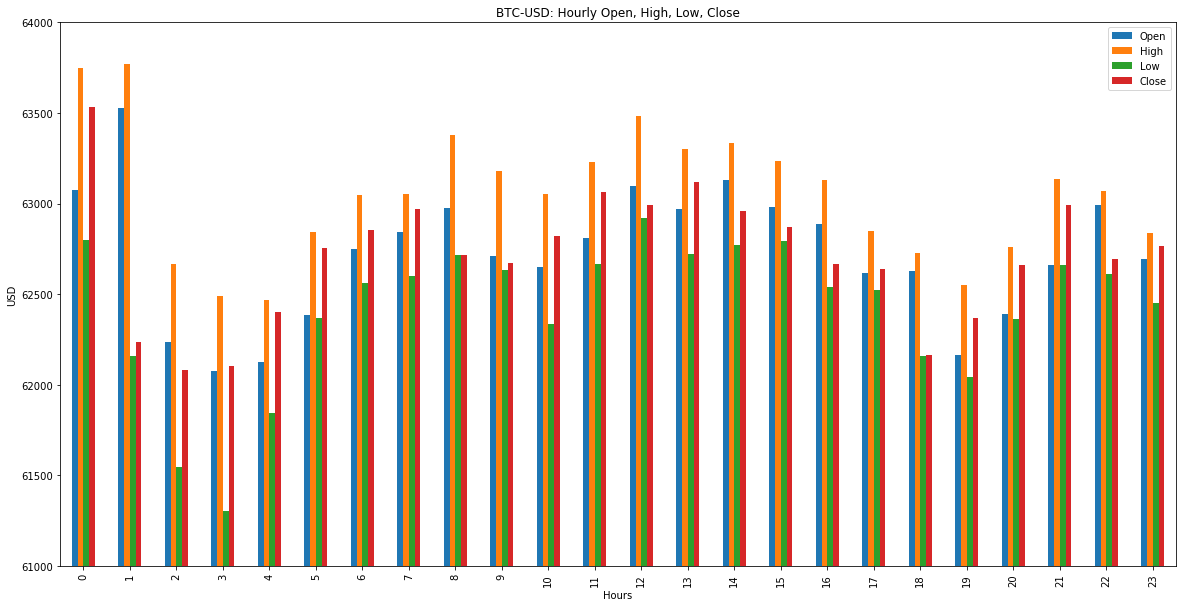

In [37]:
# Plot Open, High, Low, Close

btcusdplots.plot(x="Hours", y=["Open", "High", "Low", "Close"], kind="bar",figsize=(20,10), ylim=(61000,64000))
plt.title("BTC-USD: Hourly Open, High, Low, Close")
plt.ylabel("USD")
plt.show();

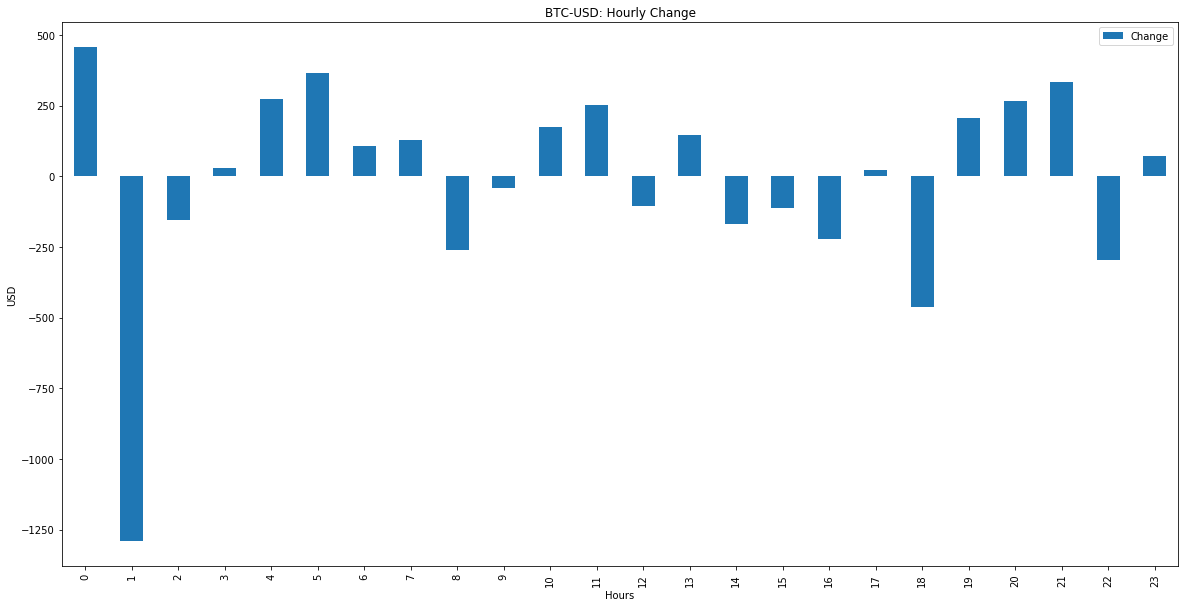

In [38]:
# Plot Hourly Change

btcusdplots.plot(x="Hours", y="Change", kind="bar",figsize=(20,10))
plt.title("BTC-USD: Hourly Change")
plt.ylabel("USD")
plt.show();

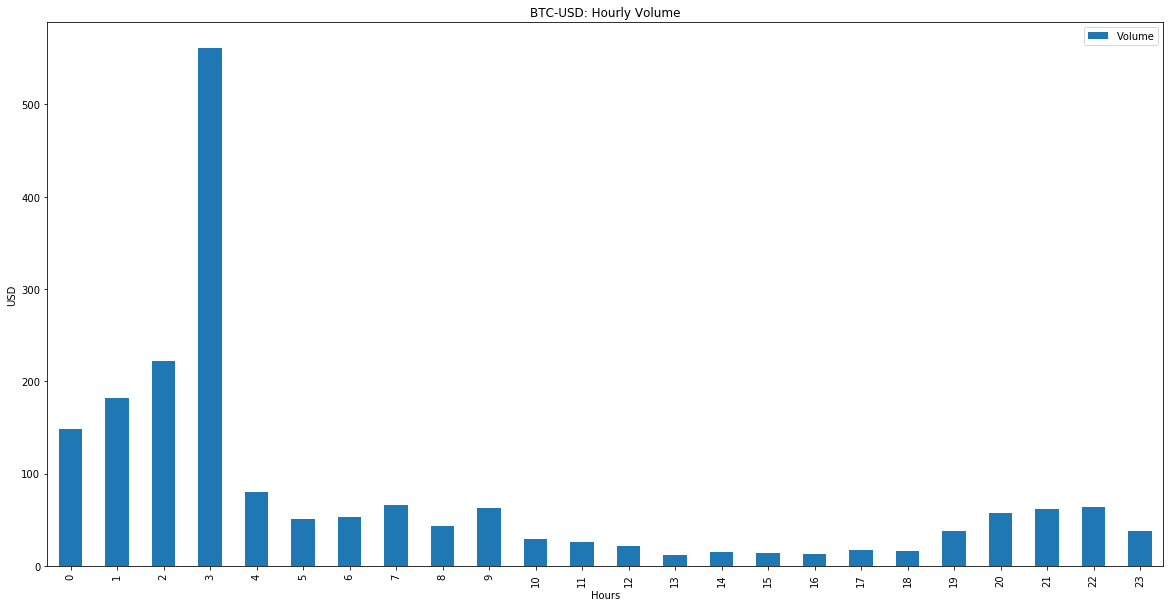

In [39]:
# Plot hourly volume

btcusdplots.plot(x="Hours", y="Volume", kind="bar",figsize=(20,10))
plt.title("BTC-USD: Hourly Volume")
plt.ylabel("USD")
plt.show();